In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stroke.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Dropping the feature id

df.drop(columns=['id'], inplace=True)

In [10]:
# Making the float dtypes to int dtypes

df['age'] = df['age'].astype('int32')

# We will Analyse to find out the below stuff

- All the Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Handling the NAN Values
- Relationship between independent and dependent feature (Stroke)

## Numerical Features

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Number of Numerical Variables: ", len(numerical_features))

Number of Numerical Variables:  6


In [12]:
df[numerical_features].head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67,0,1,228.69,36.6,1
1,61,0,0,202.21,NaN,1
2,80,0,1,105.92,32.5,1
3,49,0,0,171.23,34.4,1
4,79,1,0,174.12,24.0,1


In [13]:
for feature in numerical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))
    print('----------------------------------------------------------------------------------------')

The feature is age and number of categories are 83
----------------------------------------------------------------------------------------
The feature is hypertension and number of categories are 2
----------------------------------------------------------------------------------------
The feature is heart_disease and number of categories are 2
----------------------------------------------------------------------------------------
The feature is avg_glucose_level and number of categories are 3979
----------------------------------------------------------------------------------------
The feature is bmi and number of categories are 419
----------------------------------------------------------------------------------------
The feature is stroke and number of categories are 2
----------------------------------------------------------------------------------------


So there, are two types of Numerical features discrete and Continuous features.

## Discrete Features

In [14]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print('Discrete variables Count: {}'.format(len(discrete_features)))

Discrete variables Count: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

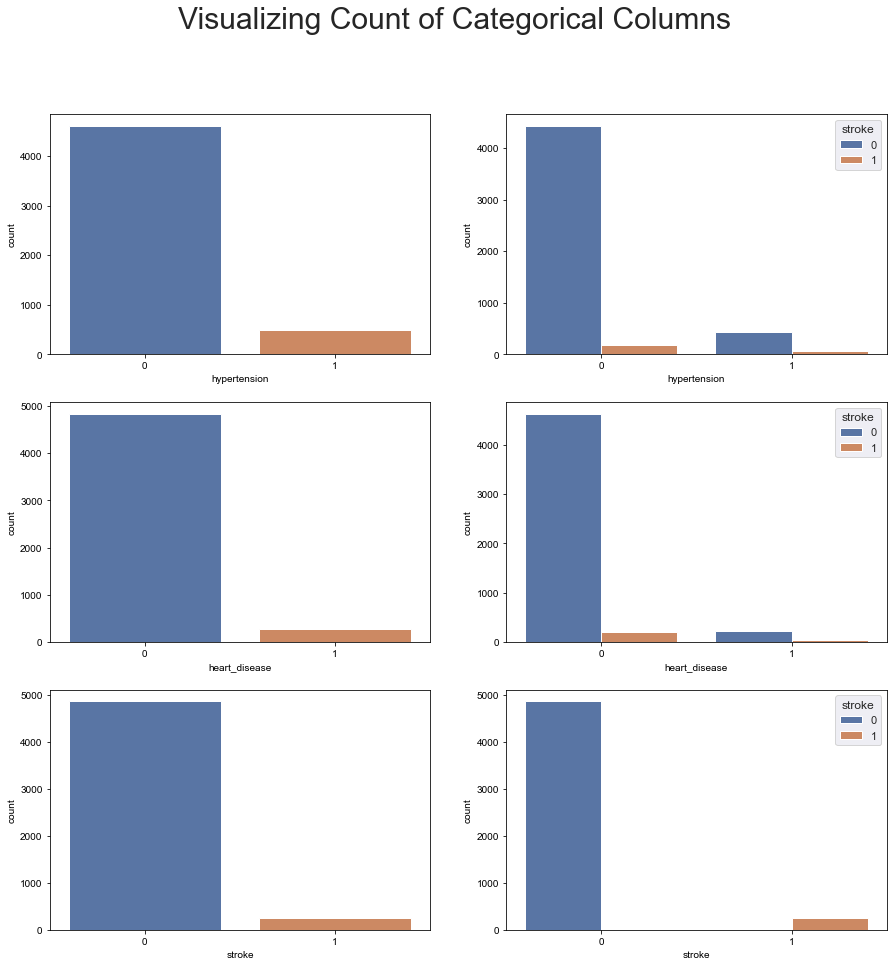

In [15]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
sns.set(rc={'figure.facecolor':'LightBlue'})
for index,i in enumerate(discrete_features):
    # sns.set(rc={'figure.facecolor':'Blue'})
    plt.suptitle("Visualizing Count of Categorical Columns", size=30)
    sns.countplot(data=df,x=i,ax=ax[index, 0])
    sns.countplot(data=df,x=i,ax=ax[index, 1],hue='stroke')

## Continuous Features

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous feature count: {}".format(len(continuous_features)))

Continuous feature count: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

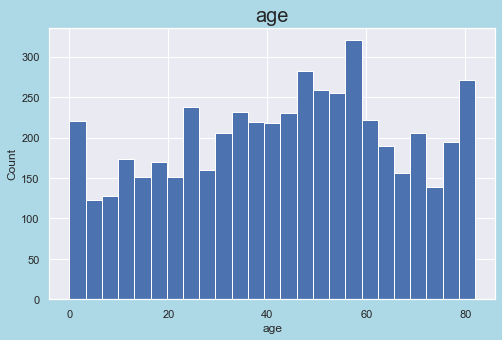

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

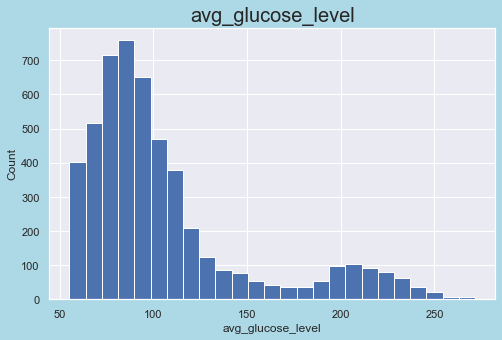

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

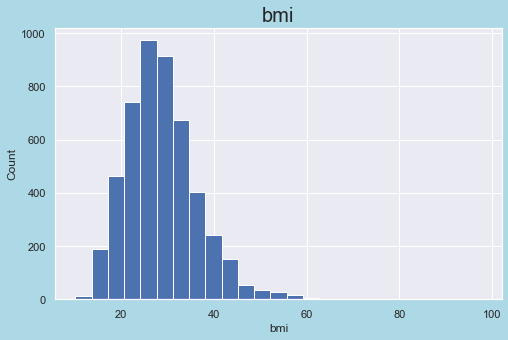

In [17]:
sns.set(rc={'figure.facecolor':'LightBlue'})
for feature in continuous_features:
    df[feature].hist(bins=25, figsize=(8,5))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature, size=20) 
    plt.show()

## Categorical Features

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Number of Categorical Variables: ", len(categorical_features))

Number of Categorical Variables:  5


In [19]:
df[categorical_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [20]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feature is gender and number of categories are 3
The feature is ever_married and number of categories are 2
The feature is work_type and number of categories are 5
The feature is Residence_type and number of categories are 2
The feature is smoking_status and number of categories are 4


In [21]:
df = df[df['gender'] != 'Other']

In [22]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
for i in categorical_features:
    print(f'-------------- Values Counts in {i} ---------------\n {df[i].value_counts()}\n')

-------------- Values Counts in gender ---------------
 Female    2994
Male      2115
Name: gender, dtype: int64

-------------- Values Counts in ever_married ---------------
 Yes    3353
No     1756
Name: ever_married, dtype: int64

-------------- Values Counts in work_type ---------------
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

-------------- Values Counts in Residence_type ---------------
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

-------------- Values Counts in smoking_status ---------------
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

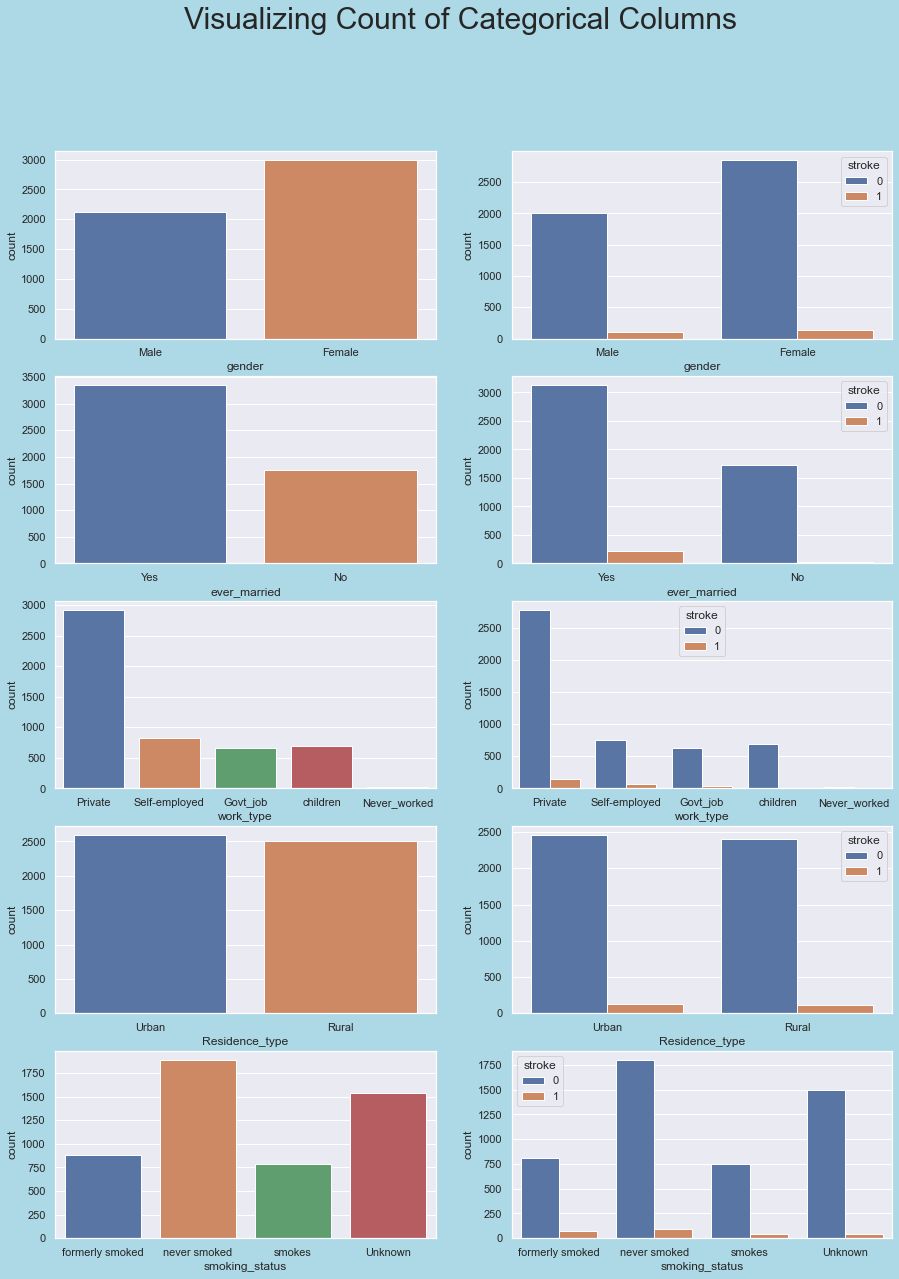

In [24]:
fig, ax = plt.subplots(5,2,figsize=(15,20))
sns.set(rc={'figure.facecolor':'LightBlue'})
for index,i in enumerate(categorical_features):
    plt.suptitle("Visualizing Count of Categorical Columns", size=30)
    sns.countplot(data=df,x=i,ax=ax[index, 0])
    sns.countplot(data=df,x=i,ax=ax[index, 1],hue='stroke')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

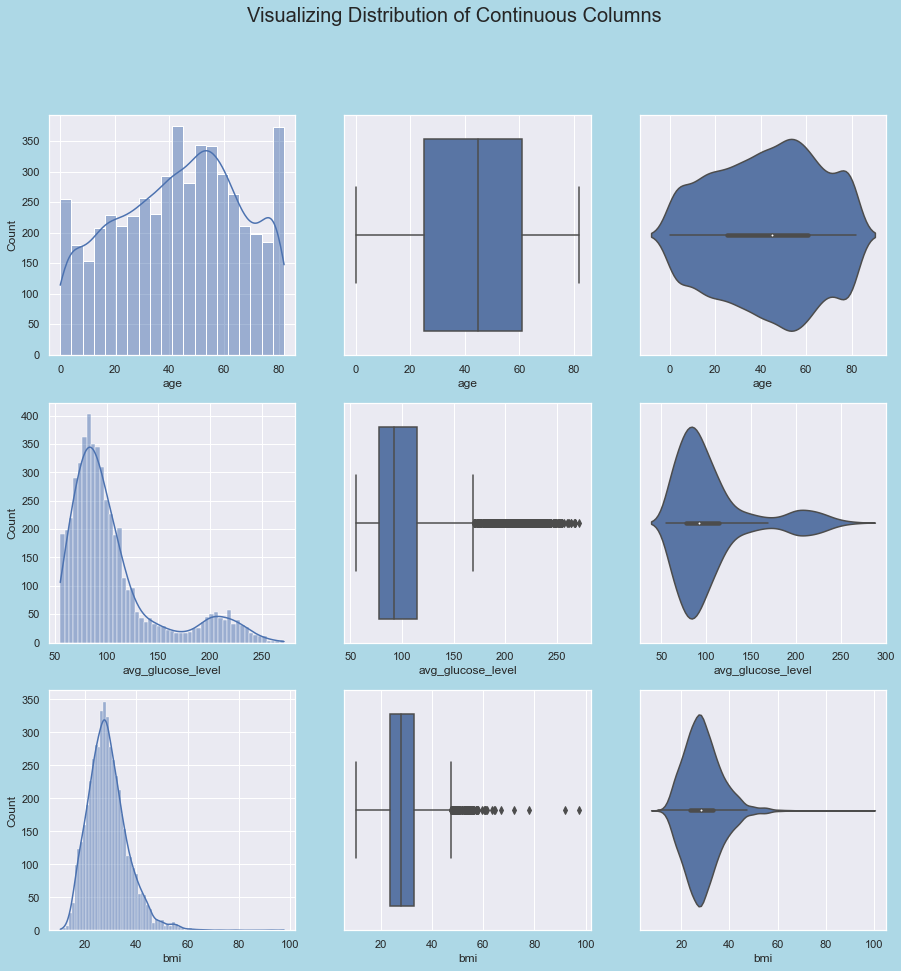

In [25]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
sns.set(rc={'figure.facecolor':'LightBlue'})
for index,i in enumerate(continuous_features):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

<IPython.core.display.Javascript object>

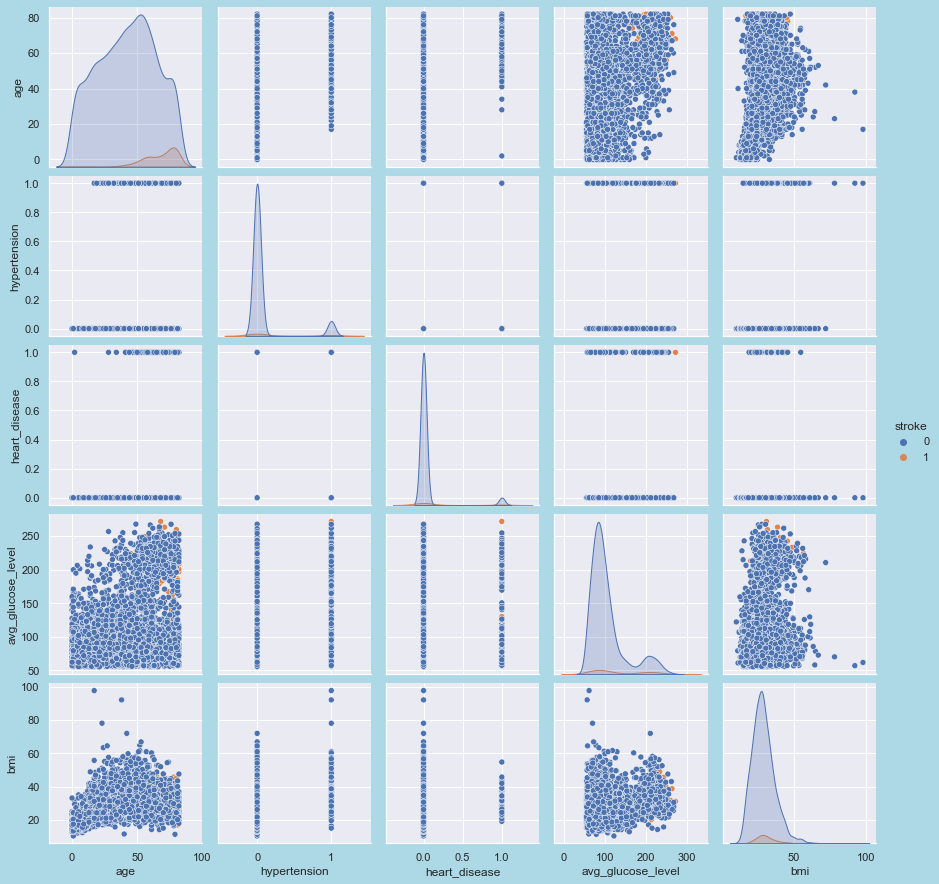

In [26]:
sns.pairplot(data=df,hue='stroke')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

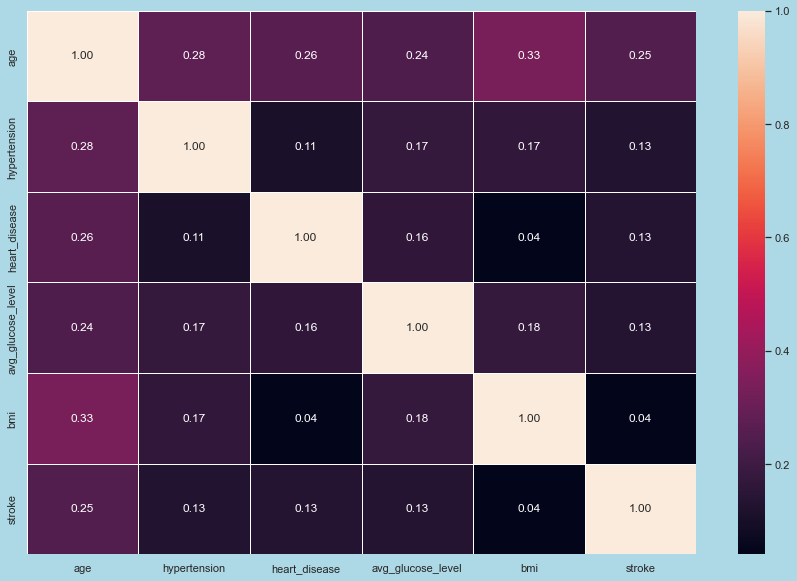

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()

In [28]:
age_group=[]
for i in df['age']:
    if i < 2:
        age_group.append('Baby')
    elif i > 2 and i <= 19:
        age_group.append('Teen')
    elif i > 19 and i < 60:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
        
df['age_group']=age_group

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Outliers')

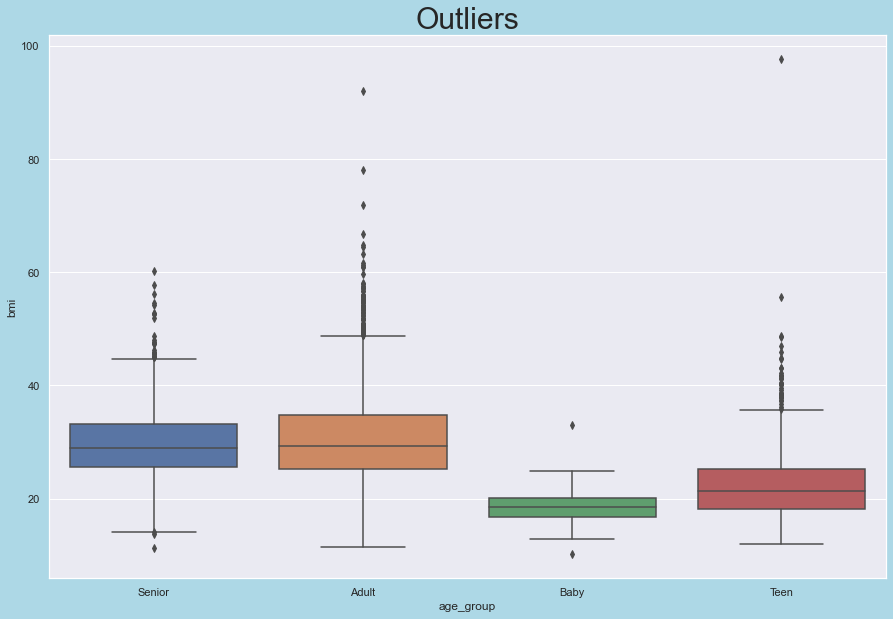

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'age_group', y = 'bmi', data = df)
plt.title('Outliers', fontsize=30)

In [30]:
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)

IQR = q3 - q1

df['bmi'] = df['bmi'].apply(lambda x:np.nan if x > q3 + 1.5 * IQR or x < q1 - 1.5 * IQR else x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

print('Upper limit: {}, Lower limit: {}'.format(upper_limit, lower_limit))

Upper limit: 47.5, Lower limit: 9.099999999999998


In [32]:
new_df = df[(df['bmi'] <= upper_limit) & (df['bmi'] >= lower_limit)]

In [33]:
new_df.shape

(4798, 12)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'BMI Boxplot'}, xlabel='bmi'>

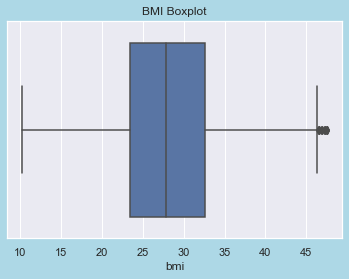

In [34]:
plt.title('BMI Boxplot')
sns.boxplot(new_df['bmi'])

In [35]:
new_df.drop(columns=['age_group'], inplace=True)

# Preprocessing

In [36]:
# OneHotEncoding using pd.get_dummies

encoder = pd.get_dummies(new_df[categorical_features],drop_first=True)

new_df[encoder.columns] = encoder
new_df.head()

<IPython.core.display.Javascript object>

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,1,1,0,1,0,0,1,1,0,0
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,1,1,0,1,0,0,0,0,1,0
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,1,0,1,0,0,1,0,0,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,1,0,0,1,0,0,0,1,0
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,1,1,0,1,0,0,1,1,0,0


In [37]:
# Dropping the Categorical Columns

new_df.drop(categorical_features, axis=1, inplace=True)
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


In [38]:
new_df.shape

(4798, 16)

# Balancing the Dataset

In [39]:
from imblearn.over_sampling import SMOTE

sample = SMOTE()
X = new_df.drop(['stroke'],axis=1)
y = new_df['stroke']
X_sample, y_sample = sample.fit_resample(X, y)

In [40]:
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


# Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [42]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Model Performing

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
!pip install lightgbm

In [45]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [46]:
models = [knn, lr, rf, svc, gbc, dt, xgb, lgbm]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print('F1 score: ', f1_score(y_test, y_pred))
    print('------------------------------------------------------------------------------------------------------')

KNeighborsClassifier()
Accuracy score:  0.9167120304844856
F1 score:  0.9210118740320082
------------------------------------------------------------------------------------------------------
LogisticRegression()
Accuracy score:  0.8568317909635275
F1 score:  0.8565193671576651
------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy score:  0.9559063690800218
F1 score:  0.9564281871974181
------------------------------------------------------------------------------------------------------
SVC()
Accuracy score:  0.914534567229178
F1 score:  0.9162666666666666
------------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy score:  0.9041916167664671
F1 score:  0.9055793991416309
------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy score:  0.93195427

# Hyperparameter Tuning

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

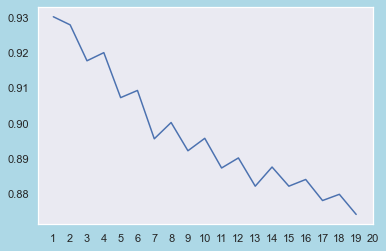

In [47]:
## Checking the best value for the KNearestNeighbor

knn_scores=[]

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    knn_scores.append(scores.mean())

treshold = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = treshold

plt.plot([k for k in range(1,20)], knn_scores)
plt.xticks(ticks = treshold, labels=x_labels)
plt.grid()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       915
           1       0.92      0.96      0.94       922

    accuracy                           0.94      1837
   macro avg       0.94      0.94      0.94      1837
weighted avg       0.94      0.94      0.94      1837



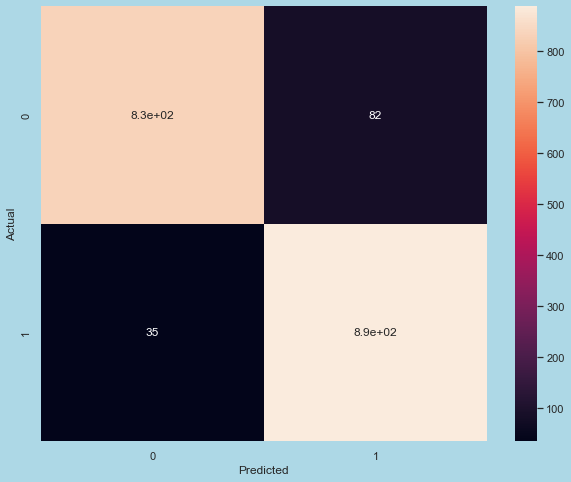

In [48]:
## KNearest Neighbors Hyperparameter Tuning

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

knn_con_matrix = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(10,8))
sns.heatmap(knn_con_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, knn.predict(X_test)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       915
           1       0.97      0.93      0.95       922

    accuracy                           0.95      1837
   macro avg       0.95      0.95      0.95      1837
weighted avg       0.95      0.95      0.95      1837



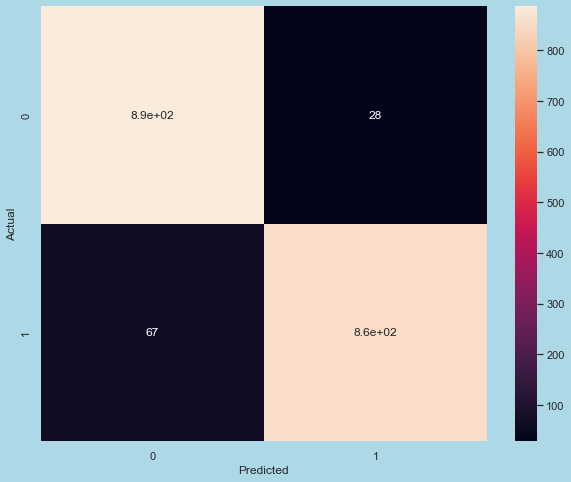

In [49]:
## Support Vector Machine Hyperparameter Tuning

param_grid = {'C':[0.001,0.01,0.1,1,10,100], 
              'gamma':[0.001,0.01,0.1,1,10,100]
}

svc_grid = RandomizedSearchCV(SVC(), param_grid, cv=5)
svc_grid.fit(X_train,y_train)
svc_pred = svc_grid.predict(X_test)
svc_con_matrix = confusion_matrix(y_test, svc_grid.predict(X_test))

plt.figure(figsize=(10,8))
sns.heatmap(svc_con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, svc_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       915
           1       0.95      0.96      0.95       922

    accuracy                           0.95      1837
   macro avg       0.95      0.95      0.95      1837
weighted avg       0.95      0.95      0.95      1837



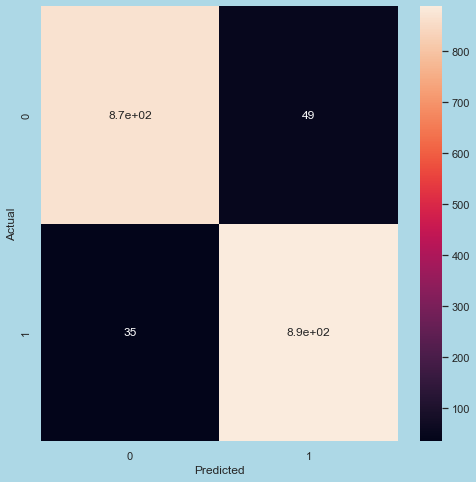

In [50]:
## Random Forest Hyperparameter Tuning

param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}

rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rf_grid.fit(X_train,y_train)
rf_pred = rf_grid.predict(X_test)
rf_con_matrix = confusion_matrix(y_test, rf_grid.predict(X_test))

plt.figure(figsize=(8,8))
sns.heatmap(rf_con_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, rf_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       915
           1       0.86      0.85      0.86       922

    accuracy                           0.86      1837
   macro avg       0.86      0.86      0.86      1837
weighted avg       0.86      0.86      0.86      1837



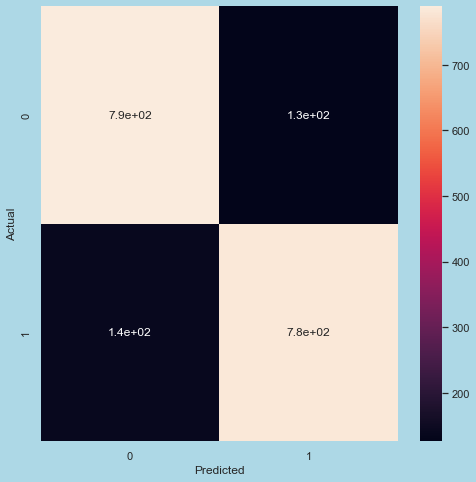

In [51]:
## Logistic Regression Hyperparameter Tuning

param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}

lr_grid = RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
lr_grid.fit(X_train,y_train)
lr_pred = lr_grid.predict(X_test)
lr_con_matrix = confusion_matrix(y_test, lr_grid.predict(X_test))

plt.figure(figsize=(8,8))
sns.heatmap(lr_con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, lr_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       915
           1       0.93      0.96      0.94       922

    accuracy                           0.94      1837
   macro avg       0.94      0.94      0.94      1837
weighted avg       0.94      0.94      0.94      1837



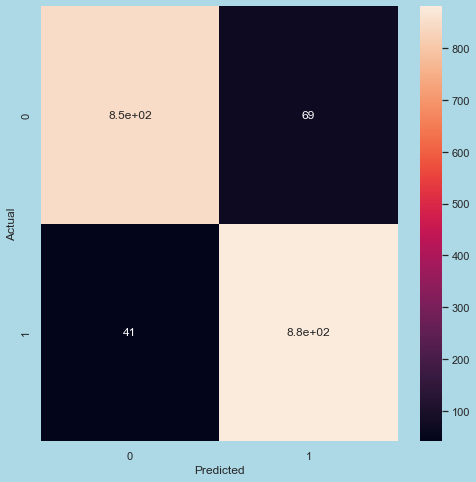

In [52]:
## Gradient Boosting Hyperparameter Tuning

param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
gbc_grid.fit(X_train,y_train)
gbc_pred = gbc_grid.predict(X_test)
gbc_con_matrix = confusion_matrix(y_test,gbc_pred)

plt.figure(figsize=(8,8))
sns.heatmap(gbc_con_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, gbc_pred))

In [54]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(df,open('svc_grid.pkl','wb'))